## Classifying (images of) clothing items with tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

In [2]:
# tfds.load returns a tf.data.Dataset object and a tf.core.DatasetInfo object. The latter contains info about how the set is split 
# into test and train, number of examples and names of features
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True) 
train_dataset, test_dataset = dataset['train'], dataset['test']

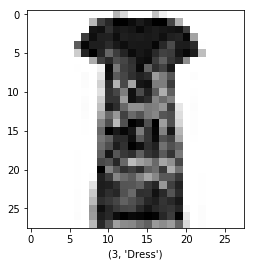

In [3]:
# Human readable labels for the classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
# Print example
for (image, label) in train_dataset.take(1):
    image = image.numpy().reshape((28,28))
    #label = label.numpy()
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((label.numpy(), class_names[label]))

In [4]:
# Size of training and test sets
train_size = metadata.splits['train'].num_examples
test_size = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(train_size))
print("Number of test examples:     {}".format(test_size))

Number of training examples: 60000
Number of test examples:     10000


In [5]:
# Normalise data
def minmaxScaling(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(minmaxScaling)
test_dataset = test_dataset.map(minmaxScaling)

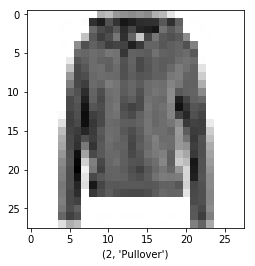

In [6]:
# Print example after normalisation
for image, label in train_dataset.take(1):
    image = image.numpy().reshape((28,28))
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((label.numpy(), class_names[label]))

## Model setup and training

In [7]:
# Model setup
# One dense layer with 128 neurons, output layer with 10 neurons
# Rather slight improvement increasing number of neurons or adding more dense layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=([28,28,1])),
    tf.keras.layers.Dense(units=128, input_shape=([784]), activation=('relu')),
    tf.keras.layers.Dense(units=10, input_shape=([1]), activation=('softmax'))
])
# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'adam',
              #optimizer = tf.keras.optimizers.Adam(0.1), 
              metrics=['accuracy'])

In [8]:
# Shuffling and splitting of training set 
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(train_size).batch(BATCH_SIZE)
test_dataset_batched = test_dataset.batch(BATCH_SIZE)

In [9]:
# Training model 
trained = model.fit(train_dataset, epochs=5, verbose=True, steps_per_epoch=np.ceil(train_size/BATCH_SIZE))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1875/1875 [==============================] - 84s 45ms/step - loss: 0.4978 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3733 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3323 - accuracy: 0.8796
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3144 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2924 - accuracy: 0.8922


In [10]:
# Evaluation on test set
test_loss, test_acc = model.evaluate(test_dataset_batched, steps=np.ceil(test_size/BATCH_SIZE))
predictions = model.predict(test_dataset_batched)

313/313 [==============================] - 3s 10ms/step - loss: 0.3614 - accuracy: 0.8659


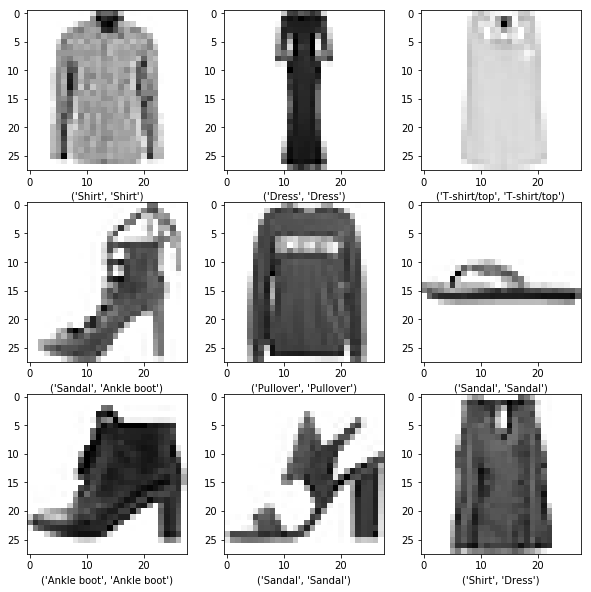

In [11]:
# Print example and its predicted class
plt.figure(figsize=(10,10))

i = 0
for (image, label) in test_dataset.take(9):
    image = image.numpy().reshape((28,28))
    plt.subplot(3,3,i+1)
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((class_names[label], class_names[predictions[i].argmax()]))
    i += 1
plt.show()

In [13]:
model.get_weights()

[array([[-0.14727695,  0.09123856, -0.06246158, ...,  0.13127798,
         -0.0024153 , -0.07473824],
        [ 0.11974981, -0.10561525,  0.03284364, ..., -0.05102951,
         -0.01063487,  0.14299136],
        [ 0.03571215, -0.34773672, -0.02795098, ..., -0.05592003,
         -0.03013276,  0.10450478],
        ...,
        [ 0.14286609,  0.0441094 , -0.01752933, ...,  0.04693229,
          0.03415076,  0.04210608],
        [-0.02906996, -0.13227043,  0.01652233, ..., -0.0794643 ,
          0.11850279, -0.16984713],
        [-0.02206863, -0.06998254, -0.09983463, ...,  0.03261673,
         -0.0492616 ,  0.18449327]], dtype=float32),
 array([-0.11110749,  0.41456872,  0.11258255,  0.03631807,  0.46197483,
         0.43403178,  0.19411993,  0.07887098,  0.12723075,  0.01758726,
        -0.27102405,  0.03648139,  0.16262859,  0.15533493,  0.30759504,
         0.18293548,  0.4779776 ,  0.02916278,  0.21631376, -0.01706176,
        -0.20275725,  0.05453487,  0.01892412,  0.13711824,  0.120